In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SalmanHabeeb/Titanic/main/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df = df.drop(columns = ["PassengerId", "Name", "Ticket"])

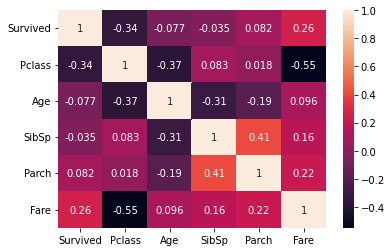

In [6]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [7]:
for column in df.dtypes[df.dtypes == object].index:
    print(f"{column}: {df[column].nunique()}")

Sex: 2
Cabin: 147
Embarked: 3


In [8]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
def replace_with_one_letter(x):
  if not pd.isnull(x):
    pattern = r'[A-Z]'
    letter = re.findall(pattern, x)[0]
    return letter

In [12]:
df["Cabin"] = df["Cabin"].apply(replace_with_one_letter)

In [13]:
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [14]:
df["Sex"] = (df["Sex"] == "female").astype(int)

In [15]:
df["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [16]:
def plot_chances(
    target_column,
    chance_column,
    df,
    labels = None,
    x_tick_labels = None,
    figsize  = (12, 8),
    x_label = 'X',
    y_label = 'Y',
    title = 'Title',
    title_fontweight = 'bold',
    title_fontstyle = 'italic',
    title_fontsize = 15,
    ):
    '''
        Input:- target_column    : (string type) Name of column whose events are to be plotted on x-axis
                chance_column    : (string type) Name of column which denotes occurance of single event using 0 and 1. Conditional 
                                   probability of this column is to plotted.
                df               : (Pandas DataFrame type) Dataframe which contains target_column and chance_column as columns
                labels           : (tuple or None type) This contain the arguments for range object. This is provided to give labels
                                   in case of continuous numerical data in target_column.
                x_tick_labels    : (dict or None type) It is a dictionary mapping unique values of target_column with custom labels we
                                   want as x-tick labels
                figsize          : (tuple of int) It contains the size of figure we want for the plot
                x_label          : (string type) Denotes label for x-axis
                y_label          : (string type) Denotes label for y-axis
                title            : (string type) Denotes the title of plot
                title_fontweight : (string type) Used to set the fontweight argument of plt.title()
                title_fontstyle  : (string type) Used to set the fontstyle argument of plt.title()
                title_fontsize   : (string type) Used to set the fontsize argument of plt.title()

        Computes the coonditional probability of occurance of event represented in chance_column, given that a unique event from 
        target_column took place.

        Displays matplotlib bar plots of the computed probability. The probability is plotted along y-axis while the events from 
        target_column are along x_axis.
    '''
    if labels is None:
        labels = list(df[target_column].unique())
    if x_tick_labels is None:
        x_tick_labels = labels
    fig, ax = plt.subplots(figsize = figsize, )
    if isinstance(labels, tuple):
        start = labels[0]
        end = labels[1]
        step = labels[2]
        start_labels = np.arange(start, end, step)
        for i in np.arange(len(start_labels)):
            plt.bar(i, df[(df[target_column] > start_labels[i]) & (df[target_column] < (start_labels[i] + step))][chance_column].mean())
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticks(np.arange(len(start_labels)))
        x_tick_labels = [f'{i}-{i+step}' for i in start_labels]
        ax.set_xticklabels(x_tick_labels)
    else:
        for i in np.arange(len(labels)):
            plt.bar(i, df[df[target_column] == labels[i]][chance_column].mean())
        
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticks(np.arange(len(labels)))
        if isinstance(x_tick_labels, dict):
            x_tick_labels_list = [i for i in np.arange(len(labels))]
            for i in labels:
                x_tick_labels_list[labels.index(i)] = x_tick_labels[i]
            ax.set_xticklabels(x_tick_labels_list)
        else:
            ax.set_xticklabels(x_tick_labels)

    plt.title(title, fontweight = title_fontweight, fontstyle = title_fontstyle, fontsize = title_fontsize)
    plt.show()

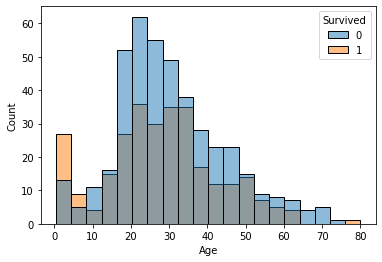

In [17]:
sns.histplot(data = df, x = "Age", hue = "Survived")
plt.show()

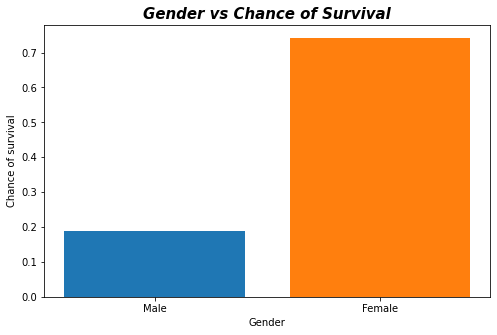

In [18]:
gender = {
    0 : "Male",
    1 : "Female",
}

plot_chances('Sex',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_tick_labels = gender,
x_label = 'Gender',
y_label = 'Chance of survival',
title = 'Gender vs Chance of Survival',
)

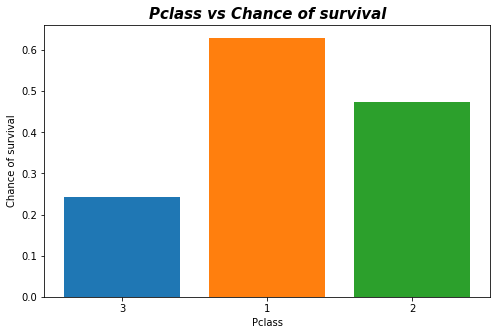

In [19]:
plot_chances('Pclass',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_label = 'Pclass',
y_label = 'Chance of survival',
title = 'Pclass vs Chance of survival',
)

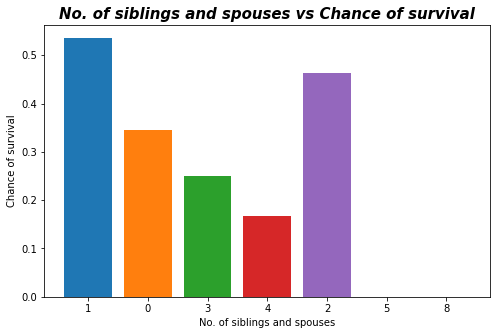

In [20]:
plot_chances('SibSp',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_label = 'No. of siblings and spouses',
y_label = 'Chance of survival',
title = 'No. of siblings and spouses vs Chance of survival',
)

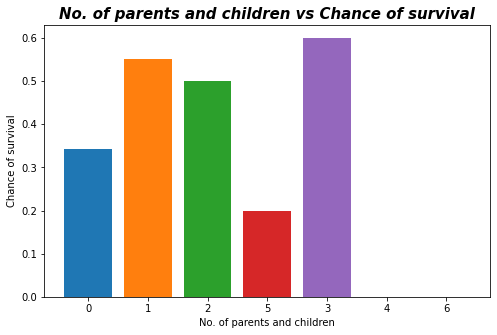

In [21]:
plot_chances('Parch',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_label = 'No. of parents and children',
y_label = 'Chance of survival',
title = 'No. of parents and children vs Chance of survival',
)

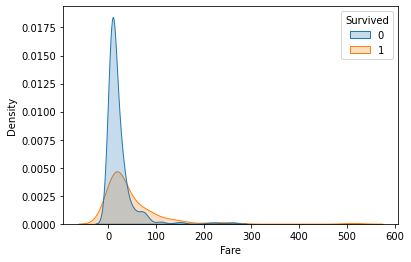

In [22]:
sns.kdeplot(data = df, hue = "Survived", x = "Fare", shade = True)
plt.show()

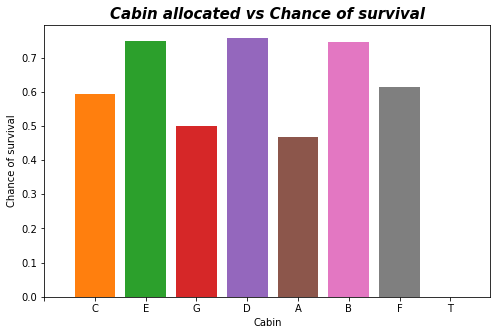

In [23]:
plot_chances('Cabin',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_label = 'Cabin',
y_label = 'Chance of survival',
title = 'Cabin allocated vs Chance of survival',
)

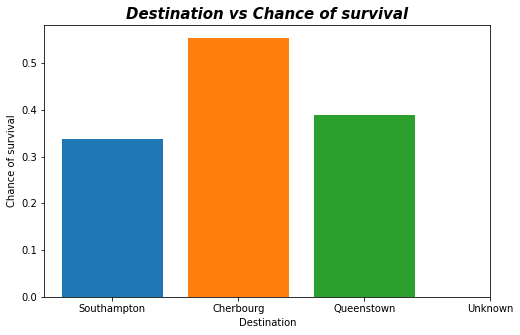

In [24]:
destinations = {
    "S" : "Southampton",
    "C" : "Cherbourg",
    "Q" : "Queenstown",
    np.nan : "Unknown",
}

plot_chances('Embarked',
chance_column = 'Survived',
df = df,
figsize = (8, 5),
x_tick_labels = destinations,
x_label = 'Destination',
y_label = 'Chance of survival',
title = 'Destination vs Chance of survival',
)

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [26]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
def fill_normalized_values(x):
  if pd.isnull(x):
    np.random.seed(1)
    mean = df["Age"].mean()
    std = df["Age"].std()
    return np.random.normal(mean, std)
  else:
    return x

In [28]:
df["Age"] = df["Age"].apply(fill_normalized_values)

In [29]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [30]:
df["Cabin"] = df["Cabin"].fillna("G")

In [31]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [32]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
df_dict = df.to_dict(orient = "records")

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
data = dv.fit_transform(df_dict)

In [36]:
data = pd.DataFrame(data, columns = dv.get_feature_names_out())

In [37]:
data

,Age,Cabin=A,Cabin=B,Cabin=C,Cabin=D,Cabin=E,Cabin=F,Cabin=G,Cabin=T,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,0.0
1,38.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,1.0,1.0
2,26.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,1.0
3,35.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,1.0,1.0
4,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0000,0.0,2.0,0.0,0.0,0.0
887,19.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0000,0.0,1.0,1.0,0.0,1.0
888,53.295166,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23.4500,2.0,3.0,1.0,1.0,0.0
889,26.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0000,0.0,1.0,0.0,0.0,1.0


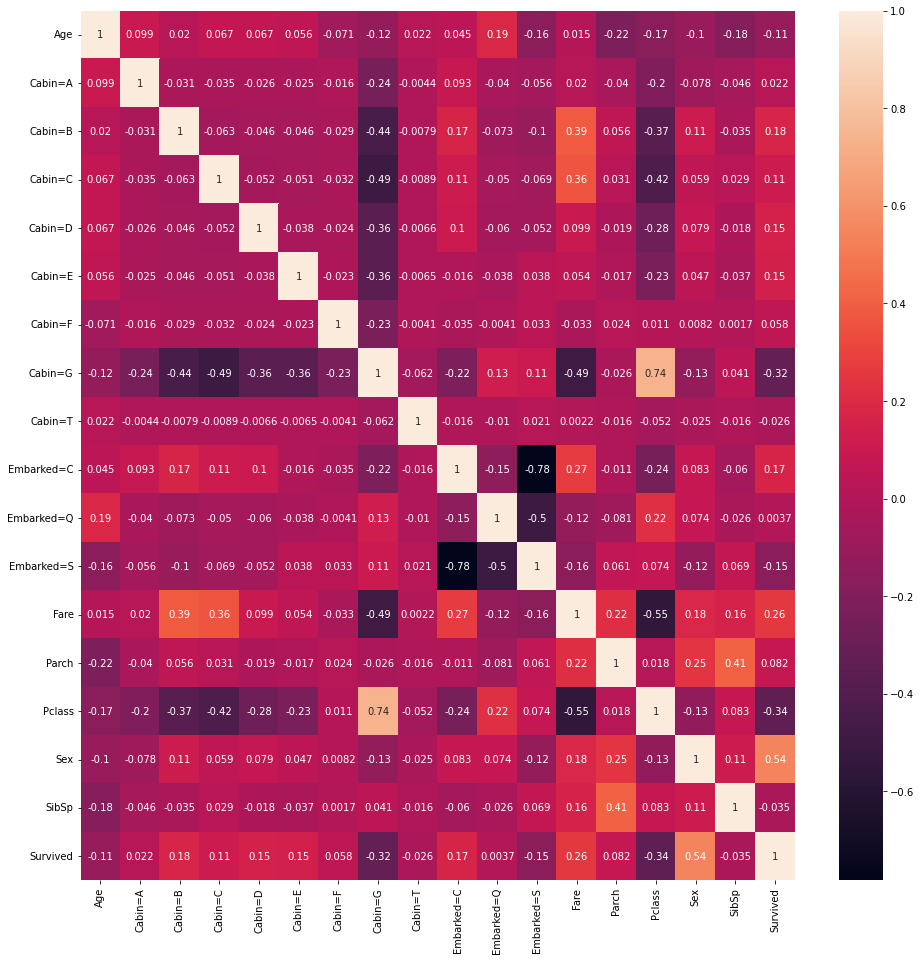

In [38]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [39]:
df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 1)

In [40]:
X_train = df_train.drop(columns = ["Survived"])
y_train = df_train["Survived"]

In [41]:
X_test = df_test.drop(columns = ["Survived"])
y_test = df_test["Survived"]

In [42]:
model = LogisticRegression(C = 1, max_iter = 500, random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [44]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [45]:
accuracy_score(train_preds, y_train)

0.8098802395209581

In [46]:
accuracy_score(test_preds, y_test)

0.7937219730941704

In [47]:
for c in [0.27, 0.28, 0.29, 0.3, 0.31, 0.32]:
    model = LogisticRegression(C = c, max_iter = 1000, random_state = 1, solver = "liblinear")
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    print(c, accuracy_score(test_preds, y_test))

0.27 0.8071748878923767
0.28 0.8116591928251121
0.29 0.8116591928251121
0.3 0.8116591928251121
0.31 0.8071748878923767
0.32 0.8071748878923767


In [48]:
best_c = 0.28

In [49]:
final_model = LogisticRegression(C = best_c, max_iter = 1000, random_state = 1, solver = "liblinear")
final_model.fit(X_train, y_train)
test_preds = final_model.predict(X_test)
print("Accuracy : ", accuracy_score(test_preds, y_test))

Accuracy :  0.8116591928251121


In [50]:
print("roc_auc_score :", roc_auc_score(y_test, test_preds))

roc_auc_score : 0.7979440789473684
